In [22]:
import pandas as pd
import numpy as np
import yaml
import xgboost
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("../../config.yaml", "r") as file:
    config = yaml.safe_load(file)

df_business = pd.read_csv(config['output_data']['business_class_data'])
df_economy = pd.read_csv(config['output_data']['economy_class_data'])
df_bookings = pd.read_csv(config['output_data']['clean_data'])

In [3]:
df_business.head()

,flight_date,airline_name,flight_code,departure_time,departure_city,arrival_time,arrival_city,flight_duration,stops,price,departure_time_group,arrival_time_group
0,2022-02-11,Air India,AI-868,18:00,Delhi,20:00,Mumbai,120,0,25612,Evening,Evening
1,2022-02-11,Air India,AI-624,19:00,Delhi,21:15,Mumbai,135,0,25612,Evening,Night
2,2022-02-11,Air India,AI-531,20:00,Delhi,20:45,Mumbai,1485,1,42220,Evening,Evening
3,2022-02-11,Air India,AI-839,21:25,Delhi,23:55,Mumbai,1590,1,44450,Night,Night
4,2022-02-11,Air India,AI-544,17:15,Delhi,23:55,Mumbai,400,1,46690,Afternoon,Night


In [4]:
df_business.dtypes

flight_date             object
airline_name            object
flight_code             object
departure_time          object
departure_city          object
arrival_time            object
arrival_city            object
flight_duration          int64
stops                    int64
price                    int64
departure_time_group    object
arrival_time_group      object
dtype: object

In [48]:
df_business['airline_name'].value_counts()

airline_name
Vistara      60589
Air India    32898
Name: count, dtype: int64

In [10]:
columns_to_drop = ['flight_date', 'flight_code', 'departure_time', 'arrival_time']
ml_business = df_business.drop(columns=columns_to_drop)
ml_business['stops'] = ml_business['stops'].astype(str)

features = ml_business.drop(columns='price')
dummy_feat = pd.get_dummies(features)
target = ml_business['price']

X_train, X_test, Y_train, Y_test = train_test_split(dummy_feat, target)

model_2 = xgboost.XGBRegressor(learning_rate=0.5)
model_2.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
print(model_2.score(X_test, Y_test))

0.8508186594899214


In [12]:
columns_to_drop = ['flight_date', 'flight_code', 'departure_time', 'arrival_time']
ml_economy = df_economy.drop(columns=columns_to_drop)
ml_economy['stops'] = ml_economy['stops'].astype(str)

features = ml_economy.drop(columns='price')
dummy_feat = pd.get_dummies(features)
target = ml_economy['price']

X_train, X_test, Y_train, Y_test = train_test_split(dummy_feat, target)

model_economy = xgboost.XGBRegressor()
model_economy.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
print(model_economy.score(X_test, Y_test))

0.3361859039045203


In [16]:
df_economy['price'].max()

42349

In [17]:
df_economy['price'].min()

1105

<Axes: ylabel='Density'>

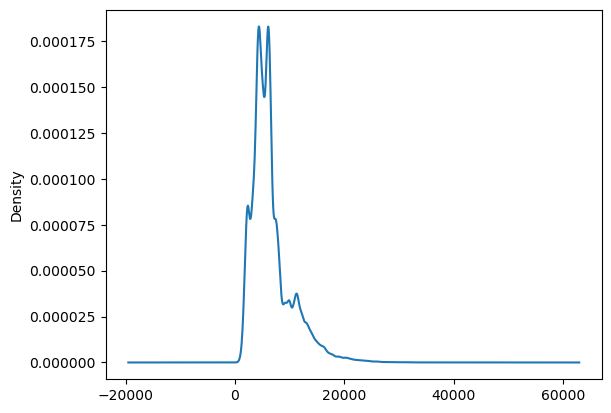

In [18]:
df_economy['price'].plot(kind='kde')

<Axes: ylabel='Density'>

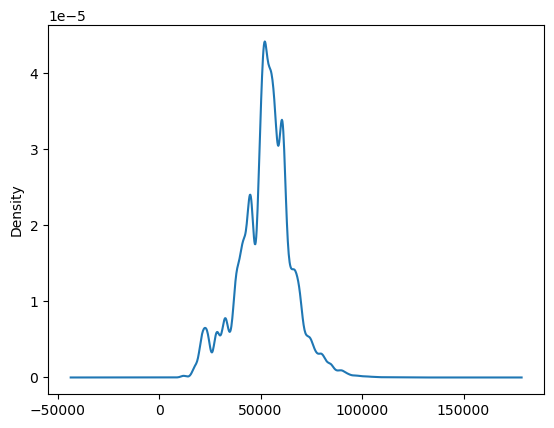

In [19]:
df_business['price'].plot(kind='kde')

In [44]:
columns_to_drop = ['flight_date', 'flight_code', 'departure_time', 'arrival_time']
ml_business = df_business.drop(columns=columns_to_drop)
ml_economy = df_economy.drop(columns=columns_to_drop)

ml_economy.head()

,airline_name,departure_city,arrival_city,flight_duration,stops,price,departure_time_group,arrival_time_group
0,SpiceJet,Delhi,Mumbai,130,0,5953,Evening,Night
1,SpiceJet,Delhi,Mumbai,140,0,5953,Morning,Morning
2,Air Asia,Delhi,Mumbai,130,0,5956,Early Morning,Morning
3,Vistara,Delhi,Mumbai,135,0,5955,Morning,Afternoon
4,Vistara,Delhi,Mumbai,140,0,5955,Morning,Morning


In [ ]:
# One-hot encoding for categorical variables
categorical_columns = ['airline_name', 'departure_city', 'arrival_city']

# Apply one-hot encoding
business_df = pd.get_dummies(ml_business, columns=categorical_columns)
economy_df = pd.get_dummies(ml_economy, columns=categorical_columns)


In [ ]:
# Label encode the categorical columns (assuming they are ordinal)
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical features
business_df['departure_time_group'] = label_encoder.fit_transform(business_df['departure_time_group'])
economy_df['departure_time_group'] = label_encoder.fit_transform(economy_df['departure_time_group'])

business_df['arrival_time_group'] = label_encoder.fit_transform(business_df['arrival_time_group'])
economy_df['arrival_time_group'] = label_encoder.fit_transform(economy_df['arrival_time_group'])

# Ensure the columns in the test set match the train set
business_df, economy_df = economy_df.align(business_df, join='outer', axis=1, fill_value=0)

# Define target and features
X_business = business_df.drop('price', axis=1)
y_business = business_df['price']

X_economy = economy_df.drop('price', axis=1)
y_economy = economy_df['price']

# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_business, y_business, test_size=0.2, random_state=42)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_regressor_e = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.5)
xgb_regressor_b = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.5)

# Fit the model for business class
xgb_regressor_b.fit(X_train_b, y_train_b)

# Fit the model for economy class
xgb_regressor_e.fit(X_train_e, y_train_e)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
economy_df.columns

Index(['airline_name_Air Asia', 'airline_name_Air India',
       'airline_name_Go First', 'airline_name_Indigo', 'airline_name_SpiceJet',
       'airline_name_Star Air', 'airline_name_TruJet', 'airline_name_Vistara',
       'arrival_city_Bangalore', 'arrival_city_Chennai', 'arrival_city_Delhi',
       'arrival_city_Hyderabad', 'arrival_city_Kolkata', 'arrival_city_Mumbai',
       'arrival_time_group', 'departure_city_Bangalore',
       'departure_city_Chennai', 'departure_city_Delhi',
       'departure_city_Hyderabad', 'departure_city_Kolkata',
       'departure_city_Mumbai', 'departure_time_group', 'flight_duration',
       'price', 'stops'],
      dtype='object')

In [56]:
business_df.columns

Index(['airline_name_Air Asia', 'airline_name_Air India',
       'airline_name_Go First', 'airline_name_Indigo', 'airline_name_SpiceJet',
       'airline_name_Star Air', 'airline_name_TruJet', 'airline_name_Vistara',
       'arrival_city_Bangalore', 'arrival_city_Chennai', 'arrival_city_Delhi',
       'arrival_city_Hyderabad', 'arrival_city_Kolkata', 'arrival_city_Mumbai',
       'arrival_time_group', 'departure_city_Bangalore',
       'departure_city_Chennai', 'departure_city_Delhi',
       'departure_city_Hyderabad', 'departure_city_Kolkata',
       'departure_city_Mumbai', 'departure_time_group', 'flight_duration',
       'price', 'stops'],
      dtype='object')

In [57]:
# Predict on test data for business class
y_pred_b = xgb_regressor_b.predict(X_test_b)

# Predict on test data for economy class
y_pred_e = xgb_regressor_e.predict(X_test_e)

# Evaluate the model using R2 and RMSE
r2_b = r2_score(y_test_b, y_pred_b)
rmse_b = np.sqrt(mean_squared_error(y_test_b, y_pred_b))

r2_e = r2_score(y_test_e, y_pred_e)
rmse_e = np.sqrt(mean_squared_error(y_test_e, y_pred_e))

print(f"Business Class R²: {r2_b:.4f}")
print(f"Business Class RMSE: {rmse_b:.4f}")

print(f"Economy Class R²: {r2_e:.4f}")
print(f"Economy Class RMSE: {rmse_e:.4f}")


Business Class R²: 0.3602
Business Class RMSE: 2984.1941
Economy Class R²: 0.8562
Economy Class RMSE: 4931.0185


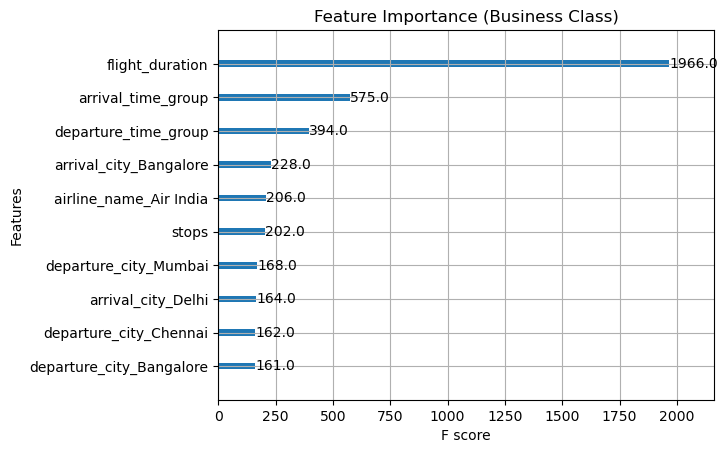

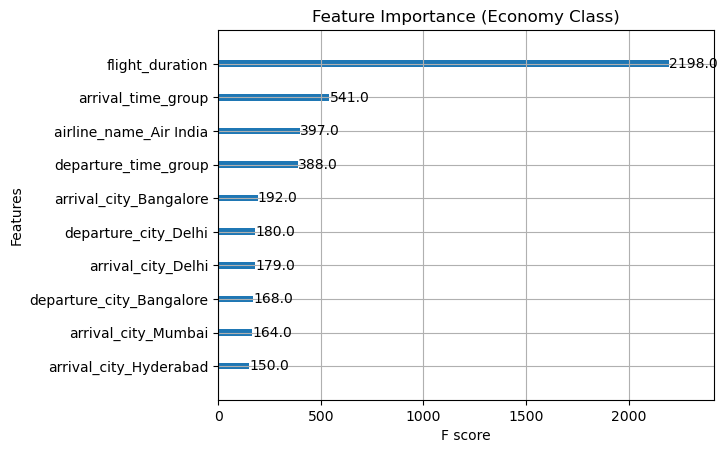

In [58]:
# Plot feature importance for business class
xgboost.plot_importance(xgb_regressor_b, importance_type='weight', max_num_features=10)
plt.title('Feature Importance (Business Class)')
plt.show()

# Plot feature importance for economy class
xgboost.plot_importance(xgb_regressor_e, importance_type='weight', max_num_features=10)
plt.title('Feature Importance (Economy Class)')
plt.show()
